In [1]:
import matplotlib.pyplot as plt

In [2]:
indices = []
reduced_list = []

with open('Run5.txt') as f:
    lines = f.readlines()
    for i in lines:
        if i[0] == '4':
            line_index = int(lines.index(i))
            indices.append(line_index)
            reduced_list.append(i)
f.close()

In [3]:
discriminator_loss = [] 
generator_loss = []
num_epochs = len(reduced_list)
epochs = []

for i in range(num_epochs):
    epochs.append(int(i))

for i in (reduced_list):
    
    index = reduced_list.index(i)
    #print('---------------------Line {}----------------------'.format(index))
    chr_find = i.find('d_loss: ')
    #print('index of : is ------  ', chr_find)
    d_loss = float(i[chr_find+7 : (chr_find+13)])
    print('discriminator loss = ', d_loss)
    discriminator_loss.append(d_loss)
    
    g_chr_find = i.find('g_loss: ')
    g_loss = float((i[g_chr_find+8 : g_chr_find+15]))
    #print('generator loss = ', g_loss)
    generator_loss.append(g_loss)  

discriminator loss =  0.356
discriminator loss =  0.802
discriminator loss =  0.393
discriminator loss =  0.177
discriminator loss =  0.139
discriminator loss =  -0.28
discriminator loss =  -0.04
discriminator loss =  0.179
discriminator loss =  0.59
discriminator loss =  0.127
discriminator loss =  0.244
discriminator loss =  0.255
discriminator loss =  0.24
discriminator loss =  0.225
discriminator loss =  0.268
discriminator loss =  0.204
discriminator loss =  0.26
discriminator loss =  0.339
discriminator loss =  0.209
discriminator loss =  0.174
discriminator loss =  0.172
discriminator loss =  0.149
discriminator loss =  0.135
discriminator loss =  0.126
discriminator loss =  0.107
discriminator loss =  0.102
discriminator loss =  0.674
discriminator loss =  1.363
discriminator loss =  0.337
discriminator loss =  0.218
discriminator loss =  0.16
discriminator loss =  0.128
discriminator loss =  0.087
discriminator loss =  0.1
discriminator loss =  0.904
discriminator loss =  0.31

(0, 5)

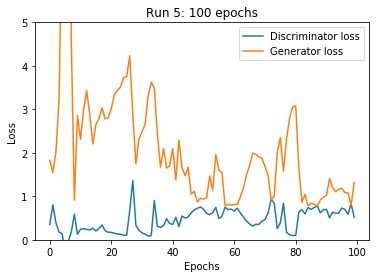

In [5]:
plt.plot(epochs, discriminator_loss, label = 'Discriminator loss')
plt.plot(epochs, generator_loss, label = 'Generator loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Run 5: 100 epochs')
plt.legend()
plt.ylim([0,5])

In [29]:
import numpy as np

ModuleNotFoundError: No module named 'optimize'

In [9]:
difference = []
for i in range(len(discriminator_loss)):
    diff = np.absolute(discriminator_loss[i]-generator_loss[i])
    difference.append(diff)

In [16]:
epochs = np.arange(0,100,1)

7.572102633244359
0.0017575585242688748


C:\Users\neham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


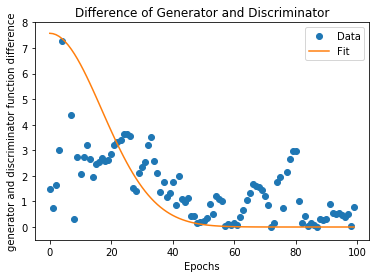

In [32]:
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

parameters, covariance = curve_fit(Gauss, epochs, difference)

#popt, pcov = opti.curve_fit(Gauss, epochs, difference)

fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

fit_y = Gauss(epochs, fit_A, fit_B)
plt.plot(epochs, difference, 'o', label='Data')
plt.plot(epochs, fit_y, '-', label='Fit')
plt.xlabel("Epochs")
plt.ylabel("generator and discriminator function difference")
plt.legend()

plt.ylim([-0.5,8])

plt.title('Difference of Generator and Discriminator')

perr = np.sqrt(np.diag(covariance))